# Homework on Numerical Analysis


## Foreword
> If you see this message it means that I have not managed to import a Chinese font into my .tex by the time of deadline, which means I will go by simple English.

Enviroment: Python 3.9

Dependencies: see next section.

## Preparations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

RESOL = 5000                     # the default number of sample points
X     = np.linspace(-1,1,RESOL)  # the default plotting nodes

## Problem I: Lebesgue Constant

### 1.1 Calculating Lebesgue function
- Part 1: Calculating elementary Lagrange polynomials at given points

In [2]:
def lagrange(x_node,x):
    """Takes interpolation nodes and enquiry points, returning a matrix of values of each Lagrange polynomial for x_node at (all) given x."""
    
    result=np.zeros((len(x_node),len(x)))
    
    # calculate each l_j for x
    for j in range(0,len(x_node)):
        
        # the derivative of omega at the j-th node
        omega_j = 1
        for i in range(0,len(x_node)):
            if i == j:
                continue
            omega_j *= x_node[j] - x_node[i]
            
        # the part that contains x
        y = np.ones(len(x))
        for i in range(0,len(x_node)):
            if i == j:
                continue
            y *= x - x_node[i]
            
        # the value of l_j at x
        result[j] = y / omega_j
        
    return result

- Part 2: Calculating Lebesgue function

In [3]:
def lebesgue(nodes,x):
    """ Calculates the Lebesgue function with nodes at x"""

    # get the absolute values of Lagrange polynomials at x
    l = lagrange(nodes,x)
    l = np.abs(l)
    
    # and add them up    
    y = np.zeros(len(x))
    for j in range(0, len(nodes)):
        y += l[j]
        
    return y

### 1.2 Equidistant nodes

The Lebesgue constant for 5 equidistant nodes is about 2.2078243740159795.
The Lebesgue constant for 11 equidistant nodes is about 29.8998156827233.
The Lebesgue constant for 21 equidistant nodes is about 10986.650120922865.


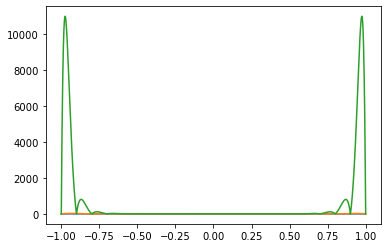

In [4]:
for n in [4,10,20]:
    y = lebesgue(np.linspace(-1,1,n+1),X)
    plt.plot(X,y)
    print("The Lebesgue constant for "+str(n+1)+" equidistant nodes is about "+str(np.max(y))+'.')
plt.show()

The Lebesgue constant of the last interpolation exceeds 1e4. That's ridiculous (as expected). To see it better I remove the last interpolation.

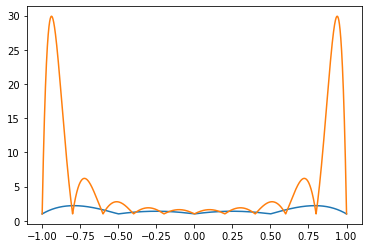

In [5]:
for n in [4,10]:
    plt.plot(X,lebesgue(np.linspace(-1,1,n+1),X))
plt.show()

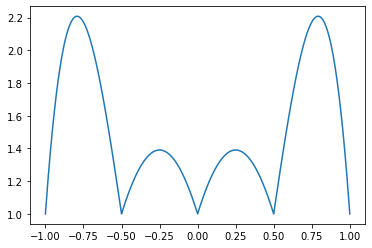

In [6]:
for n in [4]:
    plt.plot(X,lebesgue(np.linspace(-1,1,n+1),X))
plt.show()

**Conclusion.** For equidistant nodes, the Lebesgue constant increases rapidly with the number of nodes near the boundary of the interpolation interval, which means the error there is not controlled.

### 1.3 Chebyshev nodes

The Lebesgue constant for 5 Chebyshev nodes is about 1.7987618032813761.
The Lebesgue constant for 11 Chebyshev nodes is about 2.420966833852362.
The Lebesgue constant for 21 Chebyshev nodes is about 2.867797013492955.


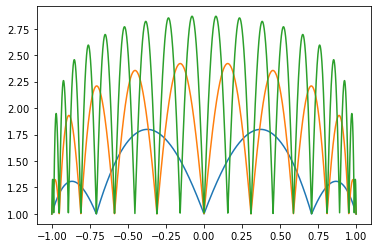

In [7]:
for n in [4,10,20]:
    chebyshev_nodes = np.cos(np.pi*(np.linspace(0,1,n+1)))
    y = lebesgue(chebyshev_nodes,X)
    plt.plot(X,y)
    print("The Lebesgue constant for "+str(n+1)+" Chebyshev nodes is about "+str(np.max(y))+'.')
plt.show()

That makes sense: the constant increases with the number of nodes slowly, making Chebyshev nodes ideal for interpolation.

## Problem II: Runge Phenomenom

In [8]:
# Interpolated functions
def runge(x):
    return 1/(1+np.square(x))

def func3(x):
    return np.exp(-np.square(x)/5)

In [9]:
# self-made Lagrange interpolation with the code at 1.1
def homemade_polyfit(nodes,y_nodes,x):
    y = np.zeros(len(x))
    l = lagrange(nodes,x)
    
    for i in range(0, len(x)):
        for j in range(0, len(nodes)):
            y[i] += l[j][i] * y_nodes[j]
    return y

### 2.1 Equidistant nodes

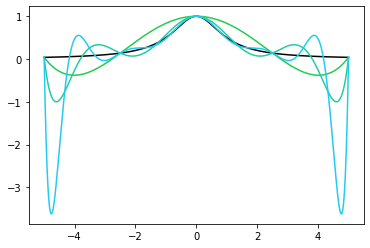

In [10]:
x5 = 5*X # sampling points
plt.plot(x5,runge(x5),color="#000000") # BLACK line for Runge function
for n in [4,8,12]:
    x = 5*np.linspace(-1,1,n+1)
    plt.plot(x5,homemade_polyfit(x,runge(x),x5),color="#22cc"+hex(20*(n))[2:]) # The more the nodes are, the BLUER the line
plt.show()

As is expected, with the number of nodes increasing, the error around zero converges to zero, while the error near the boundary diverges into infinity. This result lead to the conclusion that interpolation at equidistant nodes does not nessasarily provide a good approximation of the interpolated function.

### 2.2 Chebyshev nodes

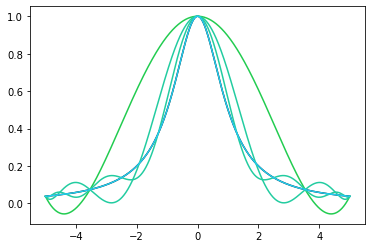

In [11]:
plt.plot(x5,runge(x5),color="#000000") # BLACK line for Runge function
for n in [4,8,12,50]:
    x = 5*np.cos(np.linspace(0,np.pi,n+1))
    plt.plot(x5,homemade_polyfit(x,runge(x),x5),color="#22cc"+hex(80*(int(np.log(n))))[2:]) # The more the nodes are, the BLUER the line
plt.show()

The bluest line almost completely overlaps with the interpolated function. The error is plotted below.

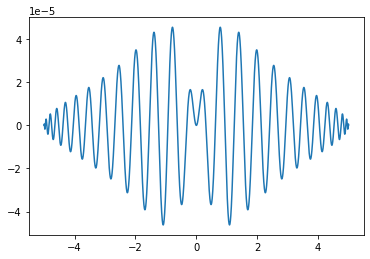

In [12]:
for n in [50]:
    x = 5*np.cos(np.linspace(0,np.pi,n+1))
    plt.plot(x5,homemade_polyfit(x,runge(x),x5)-runge(x5))
plt.show()

The error is at 1e-4.

At Chebyshev nodes, however, the interpolation converges uniformly to Runge function on given interval.

### 2.3 Another Function

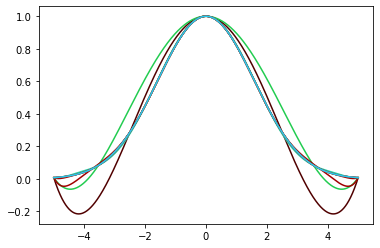

In [13]:
plt.plot(x5,func3(x5),color="#000000") # BLACK for the interpolated
for n in [4,8,12,50]:
    x = 5*np.linspace(-1,1,n+1)
    plt.plot(x5,homemade_polyfit(x,func3(x),x5),color="#"+hex(80*(int(np.log(n))))[2:]+"0000") # REDER for more equidistant nodes
    x = 5*np.cos(np.linspace(0,np.pi,n+1))
    plt.plot(x5,homemade_polyfit(x,func3(x),x5),color="#22cc"+hex(80*(int(np.log(n))))[2:]) # BLUER for more Chebyshev nodes
plt.show()

All of the interpolations  are plotted on the same graph but only three of them visbly differentiate from the interpolated function, which are the first two interpolations at equidistant nodes and the first one at Chebyshev nodes. Observed from this, interpolation at Chebyshev nodes converges faster than that at equidistant nodes.

## Problem III: Cubic Spline Interpolation

In [14]:
# data
x = np.array([1.5 ,0.9,0.6,0.35,0.2 ,0.1,0.5,1  ,1.5])
y = np.array([0.75,0.9,1  ,0.8 ,0.45,0.2,0.1,0.2,0.25])

# distance
d = np.sqrt(np.square(x[1:]-x[:-1])+np.square(y[1:]-y[:-1]))

# determine parameter nodes with distance
t_node = np.zeros(len(x))
for i in range(1,9):
    t_node[i] = t_node[i-1]+d[i-1]

# the scipy equivalent of spline()
f_x = interp1d(t_node, x, kind='cubic')
f_y = interp1d(t_node, y, kind='cubic')

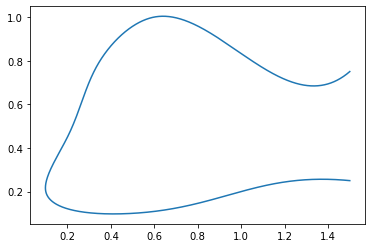

In [15]:
# plotting points
t = t_node[-1] * np.linspace(0,1,RESOL)

plt.plot(f_x(t),f_y(t))
plt.show()

One of the applications of such a technique is to draw smooth lines, possibly for artistic or practical purposes. I am sorry that I cannot present in this homework an intriguing idea of how this can be used to decorate... Minecraft worlds. (Trivial as it is compared to other uses of cubic spline, I'm quite sure it will raise the interest of some Minecraft archetects.) As far as GitHub knows the closest tool that has been made is [this particle generator written in Java](https://github.com/CubBossa/SplineLib), and if I make any progress I will probably post some screenshots to the Wechat group. (Another off-topic remark: this idea is the sole reason that I used python instead of MATLAB for the homework, since the latter cannot interact with Minecraft conveniently.)

## Endnotes (GitHub ver)
- I've done importing fonts and above is my back up for the untranslated version.
- The minecraft project mentioned above is a birthday gift for my friend [@Cynthia7979](https://github.com/Cynthia7979). If fortunate it can be found at another repo of mine.